# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
label = LabelEncoder()

# Data

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.head()

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,7pQSmQ0l7QdBeL9X6CEMbH,['Erroll Garner'],I'll Remember April - Original Edited Concert ...,1955,0.92300,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,1955,0.0408,122.289,0.546,24
1,2g8MTBFRUSFKbY5RQiSSEE,['Maison & Dragen'],Chinese New Year - Radio Edit,2014,0.00019,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,2014-05-02,0.0396,130.007,0.516,0
2,2LcJoQ5SDUZrC2qUjWMEdF,"['Yoel Lerner', 'Mazi Cohen']",השפן הקטן,1981,0.90000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,1981-04-01,0.0577,83.244,0.807,38
3,6RzHyUtRNARYyn2AIuoLnY,['Barbra Streisand'],Run Wild,1980,0.29400,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,1980-09-23,0.0268,82.302,0.196,40
4,6Kd0I5es8911FZpYhFS053,['Willie Nelson'],Till I Gain Control Again - Live,1975,0.49400,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,1975,0.0283,77.854,0.239,20


# Helper functions

In [6]:
def object_identifier(dataset):
    object = []
    for name, dtypes in dataset.dtypes.items():
        if dtypes == 'object':
            object.append(name)
    return object

In [7]:
object

object

In [8]:
def label_encoder(lst, dataset):
    for i in lst:
        dataset[i] = label.fit_transform(dataset[i])
    return dataset

In [9]:
def unique_items(df):
    for i in df:
        unique = df[i].unique()
        print(f'Col: {i}, unique: {unique}, unique length: {len(unique)}')

# Data Preprocessing

In [10]:
data.shape

(129172, 19)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129172 entries, 0 to 129171
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                129172 non-null  object 
 1   artists           129172 non-null  object 
 2   name              129172 non-null  object 
 3   year              129172 non-null  int64  
 4   acousticness      129172 non-null  float64
 5   danceability      129172 non-null  float64
 6   duration_ms       129172 non-null  int64  
 7   energy            129172 non-null  float64
 8   explicit          129172 non-null  int64  
 9   instrumentalness  129172 non-null  float64
 10  key               129172 non-null  int64  
 11  liveness          129172 non-null  float64
 12  loudness          129172 non-null  float64
 13  mode              129172 non-null  int64  
 14  release_date      129172 non-null  object 
 15  speechiness       129172 non-null  float64
 16  tempo             12

In [12]:
data.isna().sum()

id                  0
artists             0
name                0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
release_date        0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [13]:
data = data.drop_duplicates()

In [14]:
data.shape

(129172, 19)

#  Helper operations

In [15]:
# Checking for Categorical data in the dataset
object_identifier(data)

['id', 'artists', 'name', 'release_date']

In [16]:
object = ['id', 'artists', 'name', 'release_date']

In [17]:
# Checking for the unique values
unique_items(data)

Col: id, unique: ['7pQSmQ0l7QdBeL9X6CEMbH' '2g8MTBFRUSFKbY5RQiSSEE'
 '2LcJoQ5SDUZrC2qUjWMEdF' ... '5n5uyFpfopa4mNdSN0gTaH'
 '0MrZG1nTNQVzeSJKi6gFVF' '2t47pq6bqRZgHdq263KxPy'], unique length: 129172
Col: artists, unique: ["['Erroll Garner']" "['Maison & Dragen']" "['Yoel Lerner', 'Mazi Cohen']"
 ... "['Vasilis Tsitsanis', 'Stella Haskil']"
 "['Jerry Herman', 'Angela Lansbury', 'Beatrice Arthur', 'Donald Pippin']"
 "['Romeo Santos', 'Anthony Santos', 'Luis Vargas', 'Raulin Rodriguez']"], unique length: 30429
Col: name, unique: ["I'll Remember April - Original Edited Concert - Live at Sunset School, Carmel-by-the-Sea, CA, September 1955"
 'Chinese New Year - Radio Edit' 'השפן הקטן' ... 'Wing$'
 'The Last Resort - 2013 Remaster' 'Chaparrita Pelo Largo'], unique length: 106371
Col: year, unique: [1955 2014 1981 1980 1975 2013 2010 2018 1926 1951 1942 1961 1963 1938
 1969 1949 1976 1966 1931 1983 1935 1978 1996 1968 2011 1965 1984 1952
 1994 1962 2019 1964 1982 1993 1960 1947 2016 1979 1990 

In [18]:
# Label encoding all the values
label_encoder(object, data)

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,126542,8442,40508,1955,0.923000,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,764,0.0408,122.289,0.5460,24
1,48777,17623,16674,2014,0.000190,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,8552,0.0396,130.007,0.5160,0
2,42900,29666,105522,1981,0.900000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,3434,0.0577,83.244,0.8070,38
3,109192,2855,73408,1980,0.294000,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,3366,0.0268,82.302,0.1960,40
4,107320,29114,91203,1975,0.494000,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,2658,0.0283,77.854,0.2390,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129167,15466,25683,62845,2002,0.000409,0.534,150360,0.891,0,0.000066,8,0.1010,-2.599,1,6737,0.0399,144.445,0.6820,49
129168,39990,25806,76082,1968,0.750000,0.572,208733,0.407,0,0.000037,3,0.0792,-11.610,1,1826,0.0563,207.425,0.8950,34
129169,98777,17536,99701,2012,0.353000,0.400,298641,0.602,0,0.000000,7,0.1910,-6.988,0,8198,0.1970,74.142,0.0964,65
129170,7111,7674,87434,1976,0.474000,0.549,444912,0.280,0,0.061200,7,0.1600,-10.692,1,2885,0.0311,125.830,0.2990,55


# Data visulaization

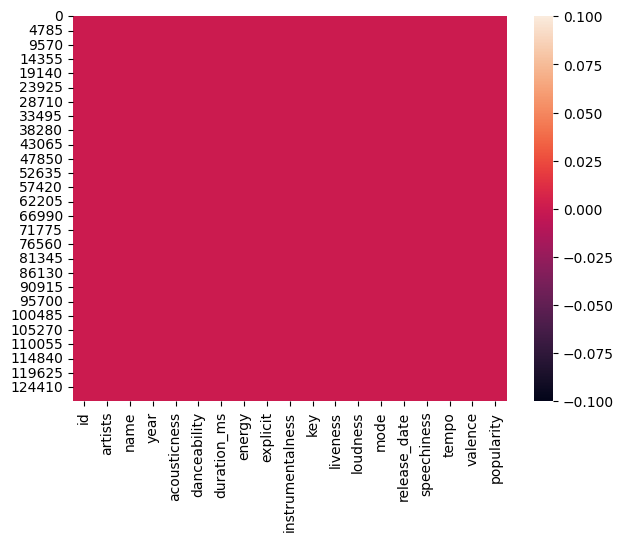

In [19]:
plt.figure(figsize=(7,5))
sns.heatmap(data.isnull())
plt.show()

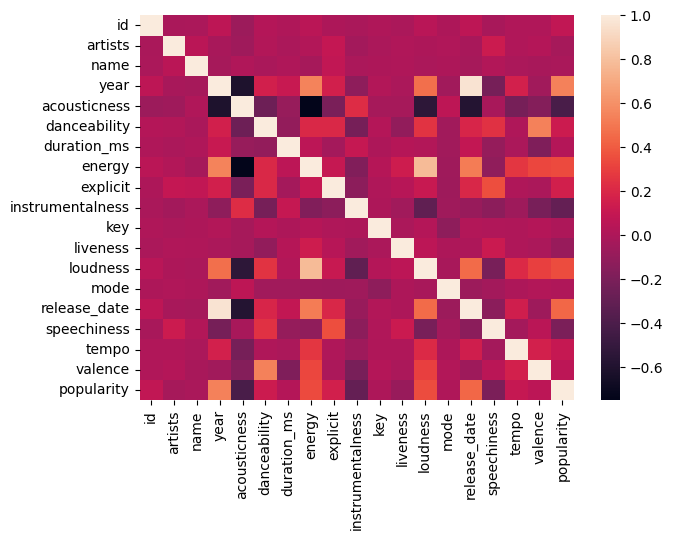

In [20]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=False, linecolor='black')
plt.show()

<Axes: xlabel='energy', ylabel='popularity'>

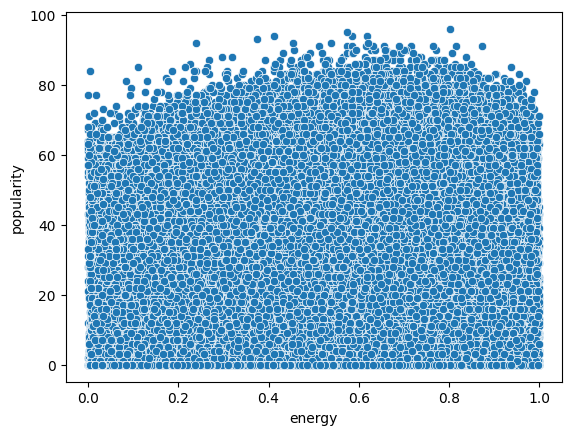

In [21]:
sns.scatterplot(data=data, x=data['energy'], y = data['popularity'], legend='auto')

<Axes: xlabel='popularity', ylabel='Count'>

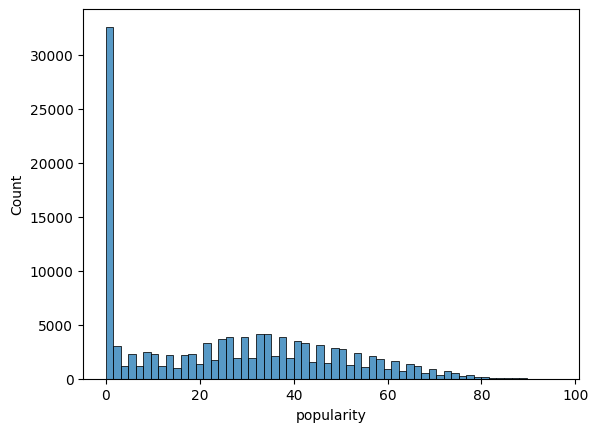

In [22]:
sns.histplot(data=data, x=data['popularity'])

# Model Building

In [23]:
x = data.drop(['id', 'acousticness', 'popularity'], axis=1)
y = data['popularity']

In [24]:
x.shape, y.shape

((129172, 16), (129172,))

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [26]:
model = RandomForestRegressor()

In [27]:
model_linear = LinearRegression()

In [33]:
model_svr = SVR()

In [28]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [29]:
model_linear.fit(x_train, y_train)

LinearRegression()

In [34]:
model_svr.fit(x_train, y_train)

SVR()

# Model Evaluation

In [30]:
model.score(x_test, y_test)

0.6999280926153272

In [31]:
model_linear.score(x_test, y_test)

0.4350713750771876

In [35]:
model_svr.score(x_test, y_test)

0.21245365909306113

# Test csv

In [30]:
test = pd.read_csv('test.csv')

In [44]:
test_next = test.copy()

In [31]:
test_copy = test.copy()

In [32]:
# Checking for Categorical data in the dataset
object_identifier(test_copy)

['id', 'artists', 'name', 'release_date']

In [33]:
# Label encoding all the values
label_encoder(object, test_copy)

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence
0,35563,681,38140,1996,0.5210,0.668,266173,0.4520,0,0.000009,9,0.0652,-9.318,1,4005,0.0314,87.967,0.4340
1,7093,6720,18674,1969,0.2300,0.468,300560,0.2800,0,0.005360,0,0.1200,-11.602,1,1520,0.0291,108.348,0.3460
2,32091,8230,27195,1984,0.0425,0.315,169827,0.5430,0,0.000019,1,0.1420,-11.942,1,2770,0.0352,158.734,0.4230
3,24553,3367,20573,1985,0.1050,0.584,229360,0.8660,0,0.001810,10,0.0383,-17.319,0,2953,0.0401,127.783,0.6950
4,19975,9744,16491,1999,0.0344,0.849,213907,0.6350,1,0.000000,0,0.0820,-9.425,1,4361,0.2660,92.003,0.8560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43053,8459,10164,14563,1959,0.7730,0.740,129387,0.0851,0,0.882000,0,0.1100,-21.219,1,773,0.0547,142.289,0.3780
43054,21793,2671,24617,1941,0.8700,0.129,40893,0.0271,0,0.030800,4,0.3830,-32.022,0,238,0.0344,97.683,0.0371
43055,37450,7923,33212,1991,0.8220,0.229,208933,0.0890,0,0.000000,2,0.3700,-18.504,1,3469,0.0376,44.068,0.1730
43056,38035,7470,11660,2018,0.1010,0.632,199625,0.8040,0,0.000000,7,0.1700,-6.109,1,6522,0.0503,92.456,0.3500


In [34]:
test_copy = test_copy.drop(['id','acousticness'], axis=1)

In [35]:
predict = model.predict(test_copy)

In [36]:
predict

array([41.6       , 30.45      , 36.76666667, ..., 36.92      ,
       53.75      , 45.41      ])

In [41]:
predict1 = model_linear.predict(test_copy)

In [42]:
predict1

array([52.14256151, 36.38098769, 44.17565404, ..., 44.14564688,
       59.34341139, 59.52948271])

In [37]:
test = test.reset_index()
ids = test.pop('id')
output = pd.DataFrame({'id': ids,
                       'popularity': predict.squeeze()})

output.head()

,id,popularity
0,6IfByzdeGt3iIsakTp16vz,41.600000
1,17TO3XH1slhDyqnwypne06,30.450000
2,5chxjST0MfWZPsaHrWgiqe,36.766667
3,4Db6PxFIiK1a6nCEJABTHk,35.010000
4,3MPKTMJIxlORqcxw542HHK,36.910000


In [47]:
test = test.reset_index()
ids = test.pop('id')
output = pd.DataFrame({'id': ids,
                       'popularity': predict.squeeze()})

output.head()

KeyError: 'id'

# Submission file

In [38]:
submission = 'submit.csv'
output.to_csv(submission, index=False)

In [39]:
submit = pd.read_csv('submit.csv')

In [40]:
submit.head()

,id,popularity
0,6IfByzdeGt3iIsakTp16vz,41.600000
1,17TO3XH1slhDyqnwypne06,30.450000
2,5chxjST0MfWZPsaHrWgiqe,36.766667
3,4Db6PxFIiK1a6nCEJABTHk,35.010000
4,3MPKTMJIxlORqcxw542HHK,36.910000
